In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#load dataset
df=pd.read_csv("expenditure.csv")
df.head()

,LOCATION,Country,TIME,Business enterprise,Government,Higher Education,Private non-profit,Rest of the world,Not specified source,Basic research,Applied research,Experimental development,Not specified activities,Medical and health sciences
0,ALB,Albania,2007,2.930940e+02,1.506861e+04,1282.00667,NaN,2273.15668,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,Albania,2008,1.218547e+03,3.020112e+04,3202.33312,NaN,2753.51278,NaN,10278.21016,19958.36723,7138.93631,NaN,NaN
2,ARE,United Arab Emirates,2014,3.157091e+06,1.092839e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,Argentina,1996,NaN,NaN,NaN,NaN,NaN,NaN,447599.43396,790068.75176,355212.36218,NaN,NaN
4,ARG,Argentina,1997,4.790537e+05,1.153081e+06,29224.56816,38536.31782,60454.74394,NaN,454170.41829,876654.52833,429525.51187,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LOCATION                     1331 non-null   object 
 1   Country                      1331 non-null   object 
 2   TIME                         1331 non-null   int64  
 3   Business enterprise          1146 non-null   float64
 4   Government                   1252 non-null   float64
 5   Higher Education             947 non-null    float64
 6   Private non-profit           904 non-null    float64
 7   Rest of the world            1137 non-null   float64
 8   Not specified source         204 non-null    float64
 9   Basic research               662 non-null    float64
 10  Applied research             673 non-null    float64
 11  Experimental development     651 non-null    float64
 12  Not specified activities     164 non-null    float64
 13  Medical and health

In [4]:
df.isnull().sum()

LOCATION                          0
Country                           0
TIME                              0
Business enterprise             185
Government                       79
Higher Education                384
Private non-profit              427
Rest of the world               194
Not specified source           1127
Basic research                  669
Applied research                658
Experimental development        680
Not specified activities       1167
Medical and health sciences     732
dtype: int64

In [5]:
#relevant numeric columns
numeric_cols = [
    'Business enterprise',
    'Government',
    'Higher Education',
    'Private non-profit',
    'Rest of the world',
    'Basic research',
    'Applied research',
    'Experimental development',
    'Medical and health sciences'
]
df[numeric_cols] = df[numeric_cols].fillna(0)

In [6]:
#drop rows with missing values
df = df.dropna(subset=['TIME', 'Country'] + numeric_cols)

In [7]:
#convert time to numeric
df['TIME'] = pd.to_numeric(df['TIME'], errors='coerce')
df=df.dropna(subset=['TIME'])

In [8]:
df=df.dropna(subset=['TIME'])

In [9]:
#creat total rnd
df['Total_RnD'] = df[numeric_cols].sum(axis=1)

In [10]:
#log transform
df['Log_RnD'] = np.log1p(df['Total_RnD'])

In [11]:
# Sort by country and time
df = df.sort_values(['Country', 'TIME']).reset_index(drop=True)

In [12]:
#create lag features
df['Lag_1'] = df.groupby('Country')['Total_RnD'].shift(1)
df['Lag_2'] = df.groupby('Country')['Total_RnD'].shift(2)

df[['Lag_1','Lag_2']] = df[['Lag_1','Lag_2']].fillna(0)

In [13]:
features = ['TIME', 'Lag_1', 'Lag_2']
target = 'Log_RnD'
X=df[features]
y=df[target]

In [14]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
lr=LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
y_pred_lr=lr.predict(X_test)

In [17]:
#evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Metrics")
print(f"MAE: {mae_lr:.2f}, RMSE:{rmse_lr:.2f}, R2:{r2_lr:.2f}")

Linear Regression Metrics
MAE: 2.10, RMSE:2.70, R2:0.26


In [18]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [19]:
y_pred_rf = rf.predict(X_test)

In [20]:
#evaluation of random forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Metrics")
print(f"MAE: {mae_rf:.2f}, RMSE:{rmse_rf:.2f}, R2:{r2_rf:.2f}")

Random Forest Metrics
MAE: 0.48, RMSE:1.08, R2:0.88


In [21]:
xgb = XGBRegressor(n_estimators=300, random_state=42)
xgb.fit(X_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_met

In [22]:
y_pred_xgb = xgb.predict(X_test)

In [23]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Metrics")
print(f"MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R2: {r2_xgb:.2f}")


XGBoost Metrics
MAE: 0.57, RMSE: 1.22, R2: 0.85


In [24]:
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_lr, rmse_lr, r2_lr = compute_metrics(y_test, y_pred_lr)
mae_rf, rmse_rf, r2_rf = compute_metrics(y_test, y_pred_rf)
mae_xgb, rmse_xgb, r2_xgb = compute_metrics(y_test, y_pred_xgb)

metrics_df = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','XGBoost'],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R2': [r2_lr, r2_rf, r2_xgb]
})
print(metrics_df)

# Select best model
best_model_name = metrics_df.sort_values('RMSE').iloc[0]['Model']
print(f"Best model selected: {best_model_name}")

best_model = {'Linear Regression': lr,
              'Random Forest': rf,
              'XGBoost': xgb}[best_model_name]


               Model       MAE      RMSE        R2
0  Linear Regression  2.102479  2.700317  0.263926
1      Random Forest  0.476459  1.076888  0.882933
2            XGBoost  0.572953  1.221221  0.849450
Best model selected: Random Forest


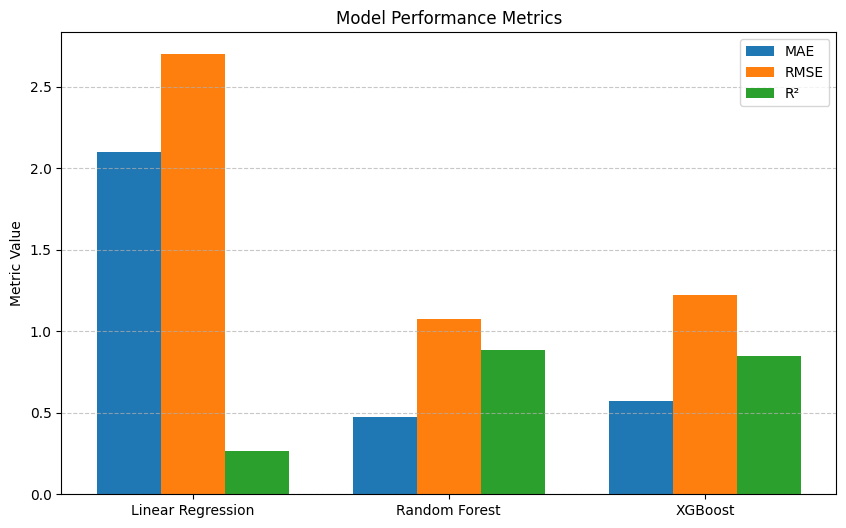

In [25]:
models = metrics_df['Model']
mae = metrics_df['MAE']
rmse = metrics_df['RMSE']
r2 = metrics_df['R2']

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, mae, width, label='MAE', color='#1f77b4')
plt.bar(x, rmse, width, label='RMSE', color='#ff7f0e')
plt.bar(x + width, r2, width, label='R²', color='#2ca02c')

plt.xticks(x, models)
plt.ylabel("Metric Value")
plt.title("Model Performance Metrics")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [26]:
future_years = [2026, 2027, 2028, 2029, 2030]
future_preds = []

# Start with last 2 known years per country
last_row = df.iloc[-1]
lag_1 = last_row['Total_RnD']  # 2025 value
lag_2 = df.iloc[-2]['Total_RnD']  # 2024 value

for year in future_years:
    X_future = pd.DataFrame({
        'TIME': [year],
        'Lag_1': [lag_1],
        'Lag_2': [lag_2]
    })
    
    log_pred = best_model.predict(X_future)[0]
    pred = np.expm1(log_pred)
    
    future_preds.append(pred)
    
    # Update lags for next year
    lag_2 = lag_1
    lag_1 = pred

forecast_df = pd.DataFrame({
    'Year': future_years,
    'Predicted_RnD': future_preds
})

print("Future R&D Forecast (2026 to 2030)")
print(forecast_df)


Future R&D Forecast (2026 to 2030)
   Year  Predicted_RnD
0  2026     539.341142
1  2027    1411.864056
2  2028    6084.235795
3  2029   18841.426336
4  2030   31676.037472


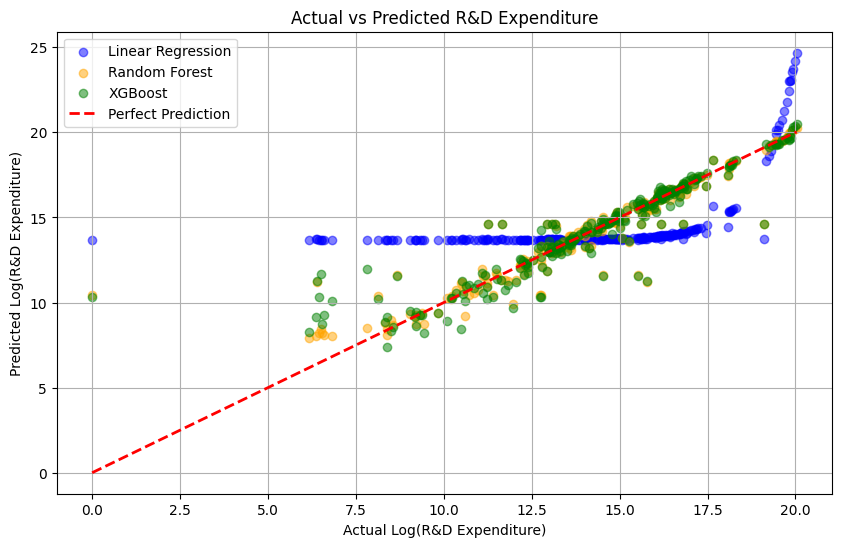

In [27]:
plt.figure(figsize=(10,6))

# Linear Regression
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Linear Regression')
# Random Forest
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.5, label='Random Forest')
# XGBoost
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.5, label='XGBoost')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Log(R&D Expenditure)")
plt.ylabel("Predicted Log(R&D Expenditure)")
plt.title("Actual vs Predicted R&D Expenditure")
plt.legend()
plt.grid(True)
plt.show()


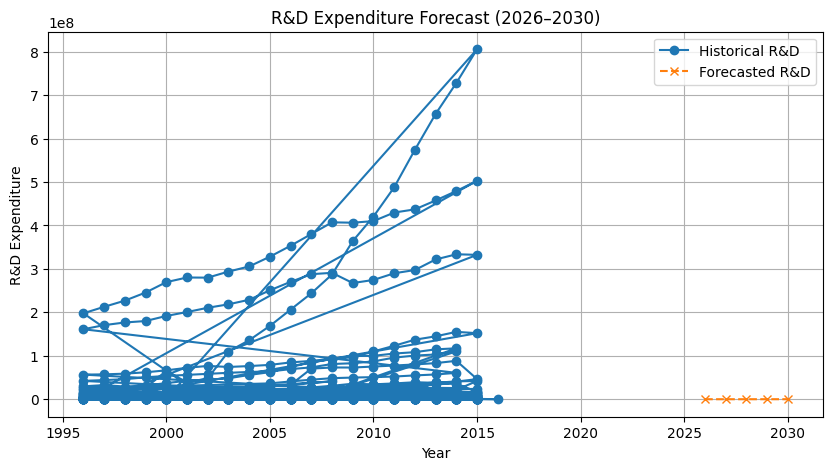

In [28]:
plt.figure(figsize=(10,5))

plt.plot(df['TIME'], df['Total_RnD'], marker='o', label='Historical R&D')
plt.plot(forecast_df['Year'], forecast_df['Predicted_RnD'],
         marker='x', linestyle='--', label='Forecasted R&D')

plt.xlabel("Year")
plt.ylabel("R&D Expenditure")
plt.title("R&D Expenditure Forecast (2026–2030)")
plt.legend()
plt.grid(True)
plt.show()


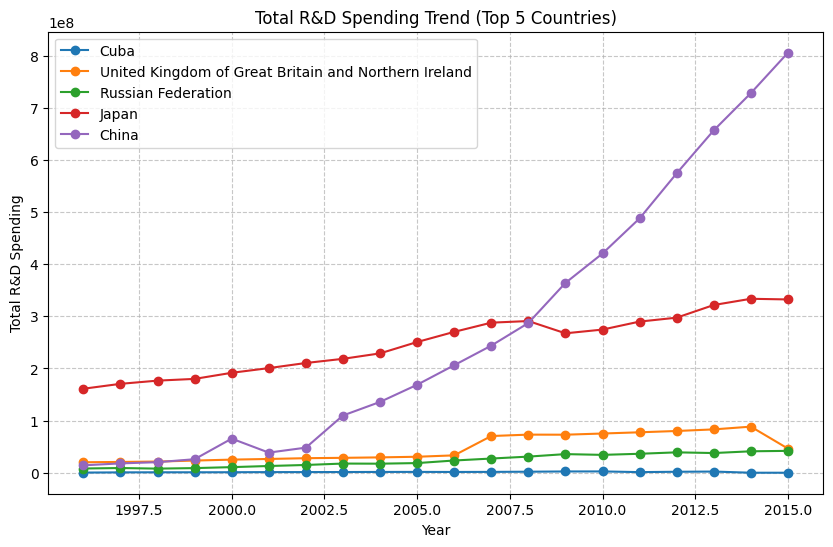

In [29]:
top_countries = df['Country'].value_counts().head(5).index

plt.figure(figsize=(10,6))

for country in top_countries:
    df_c = df[df['Country'] == country].sort_values('TIME')
    plt.plot(df_c['TIME'], df_c['Total_RnD'], marker='o', label=country)

plt.title('Total R&D Spending Trend (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Total R&D Spending')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


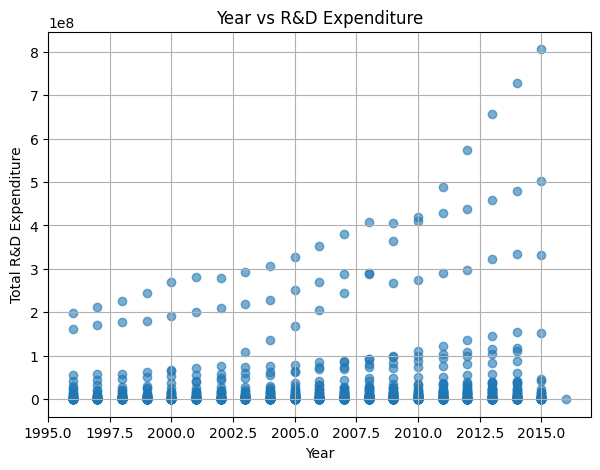

In [30]:
plt.figure(figsize=(7,5))
plt.scatter(df['TIME'], df['Total_RnD'], alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Total R&D Expenditure")
plt.title("Year vs R&D Expenditure")
plt.grid(True)
plt.show()


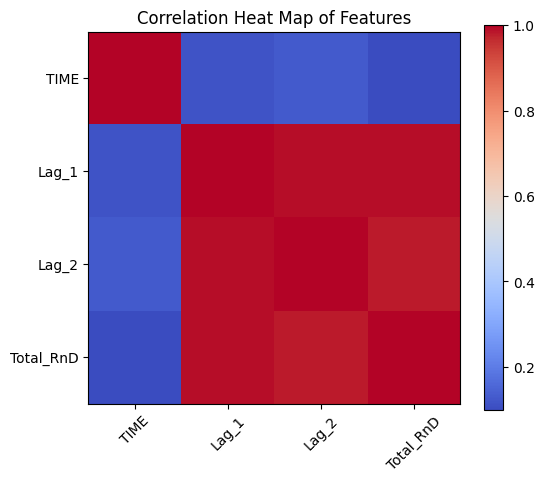

In [31]:
corr_data = df[['TIME', 'Lag_1', 'Lag_2', 'Total_RnD']].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr_data, cmap='coolwarm')
plt.colorbar()

plt.xticks(range(len(corr_data.columns)), corr_data.columns, rotation=45)
plt.yticks(range(len(corr_data.index)), corr_data.index)

plt.title("Correlation Heat Map of Features")
plt.show()


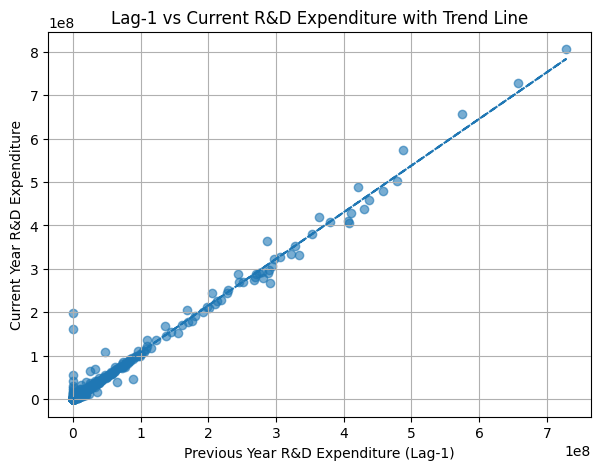

In [32]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(df['Lag_1'], df['Total_RnD'], alpha=0.6)

# Trend line (linear fit)
z = np.polyfit(df['Lag_1'], df['Total_RnD'], 1)
p = np.poly1d(z)
plt.plot(df['Lag_1'], p(df['Lag_1']), linestyle='--')

plt.xlabel("Previous Year R&D Expenditure (Lag-1)")
plt.ylabel("Current Year R&D Expenditure")
plt.title("Lag-1 vs Current R&D Expenditure with Trend Line")
plt.grid(True)
plt.show()


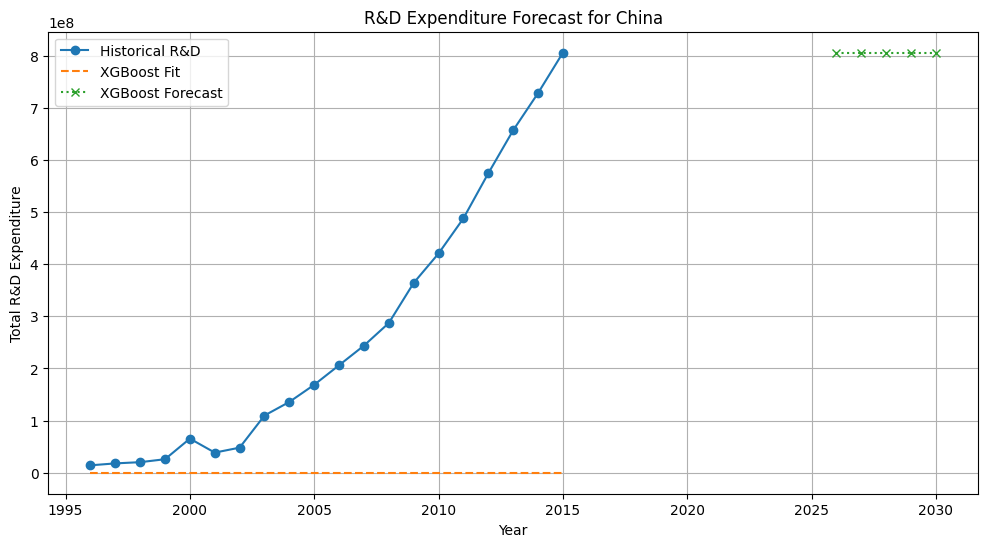

In [44]:

def plot_country_forecast(country, model_name):
    country_data = df[df['Country'] == country].copy()
    if country_data.shape[0] < 3:
        print(f"Not enough data for {country}")
        return
    
    X = country_data[features]
    y = country_data[target]
    
    # Train selected model
    if model_name == "Linear Regression":
        model = LinearRegression()
    elif model_name == "Random Forest":
        model = RandomForestRegressor(n_estimators=200, random_state=42)
    else:
        model = XGBRegressor(n_estimators=300, random_state=42)
    
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Future forecast
    future_years = [2026, 2027, 2028, 2029, 2030]
    future_preds = []
    last_vals = list(country_data['Total_RnD'].values[-2:])
    
    for year in future_years:
        row = {'TIME': year, 'Lag_1': last_vals[-1], 'Lag_2': last_vals[-2]}
        X_future = pd.DataFrame([row])
        log_pred = model.predict(X_future)[0]
        pred = np.expm1(log_pred) if target=='Log_RnD' else log_pred
        future_preds.append(pred)
        last_vals.append(pred)
        last_vals = last_vals[-2:]
    
    plt.figure(figsize=(12,6))
    plt.plot(country_data['TIME'], country_data['Total_RnD'], label="Historical R&D", marker='o')
    plt.plot(country_data['TIME'], y_pred, label=f"{model_name} Fit", linestyle='--')
    plt.plot(future_years, future_preds, label=f"{model_name} Forecast", marker='x', linestyle=':')
    plt.title(f"R&D Expenditure Forecast for {country}")
    plt.xlabel("Year")
    plt.ylabel("Total R&D Expenditure")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_country_forecast("China", "XGBoost")
